In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nslkdd/KDDTest+.arff
/kaggle/input/nslkdd/KDDTest-21.arff
/kaggle/input/nslkdd/KDDTest1.jpg
/kaggle/input/nslkdd/KDDTrain+.txt
/kaggle/input/nslkdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/KDDTest-21.txt
/kaggle/input/nslkdd/KDDTest+.txt
/kaggle/input/nslkdd/KDDTrain+.arff
/kaggle/input/nslkdd/index.html
/kaggle/input/nslkdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/KDDTrain1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTest1.jpg
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest-21.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTest+.txt
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+.arff
/kaggle/input/nslkdd/nsl-kdd/index.html
/kaggle/input/nslkdd/nsl-kdd/KDDTrain+_20Percent.arff
/kaggle/input/nslkdd/nsl-kdd/KDDTrain1.jpg


In [2]:
#Load dataset
local_path = "/kaggle/input/nslkdd/"
df_train = pd.read_csv(local_path +"KDDTrain+.txt", header = None)
df_test = pd.read_csv(local_path +"KDDTest+.txt", header = None)

In [3]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

df_train.columns = columns
df_test.columns = columns

In [4]:
import pandas as pd
import numpy as np

class_counts = df_train['outcome'].value_counts()
imbalance_ratio = class_counts.max() / class_counts

summary = pd.DataFrame({
    "Count": class_counts,
    "Imbalance_Ratio_vs_Majority": imbalance_ratio
})

print(summary)

                 Count  Imbalance_Ratio_vs_Majority
outcome                                            
normal           67343                     1.000000
neptune          41214                     1.633984
satan             3633                    18.536471
ipsweep           3599                    18.711587
portsweep         2931                    22.976117
smurf             2646                    25.450869
nmap              1493                    45.105827
back               956                    70.442469
teardrop           892                    75.496637
warezclient        890                    75.666292
pod                201                   335.039801
guess_passwd        53                  1270.622642
buffer_overflow     30                  2244.766667
warezmaster         20                  3367.150000
land                18                  3741.277778
imap                11                  6122.090909
rootkit             10                  6734.300000
loadmodule  

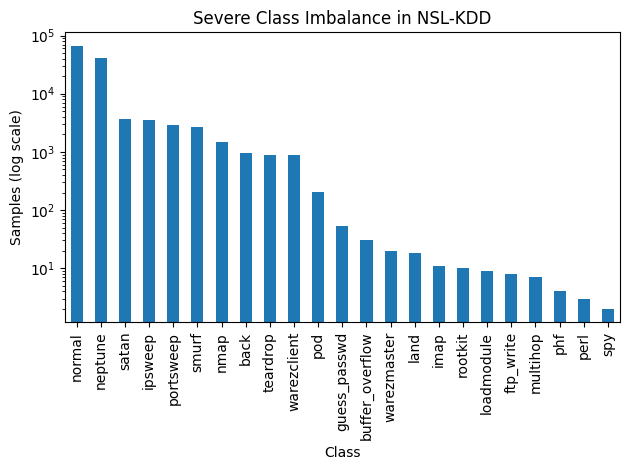

In [5]:
import matplotlib.pyplot as plt

plt.figure()
class_counts.plot(kind='bar', logy=True)
plt.ylabel("Samples (log scale)")
plt.xlabel("Class")
plt.title("Severe Class Imbalance in NSL-KDD")
plt.tight_layout()
plt.show()

In [6]:
def gini(array):
    array = np.array(array)
    array = array.flatten()
    array = np.sort(array)
    n = len(array)
    cumulative = np.cumsum(array)
    return (n + 1 - 2 * np.sum(cumulative) / cumulative[-1]) / n

gini_index = gini(class_counts.values)
print("Gini coefficient of class distribution:", gini_index)

Gini coefficient of class distribution: 0.8740789520459699


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ['protocol_type', 'service', 'flag']
numerical = [c for c in df_train.columns if c not in categorical + ['outcome', 'level']]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ]
)

In [8]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.5/198.5 kB 5.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.5/198.5 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.4 MB/s eta 0:00:0000:01


In [9]:
!pip install ctgan

In [10]:
import pandas as pd
import numpy as np

def bootstrap_minority(df, label_col, min_samples=30, random_state=42):
    np.random.seed(random_state)
    augmented = []

    for cls in df[label_col].unique():
        subset = df[df[label_col] == cls]

        if len(subset) < min_samples:
            reps = min_samples // len(subset) + 1
            subset = pd.concat([subset] * reps).sample(min_samples, replace=False)

        augmented.append(subset)

    return pd.concat(augmented).sample(frac=1).reset_index(drop=True)

bootstrapped = bootstrap_minority(df_train, "outcome", min_samples=30)
print(bootstrapped['outcome'].value_counts())

outcome
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
land                  30
multihop              30
warezmaster           30
loadmodule            30
phf                   30
imap                  30
perl                  30
ftp_write             30
spy                   30
rootkit               30
buffer_overflow       30
Name: count, dtype: int64


In [15]:
from sdv.metadata import SingleTableMetadata
from sdv.single_table import CTGANSynthesizer

# Metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=bootstrapped)

categorical_cols = ['protocol_type', 'service', 'flag', 'outcome']
for col in categorical_cols:
    metadata.update_column(col, sdtype='categorical')

metadata.validate()

# CTGAN (corrected)
ctgan = CTGANSynthesizer(
    metadata=metadata,
    epochs=300,              # 300 is usually enough
    batch_size=1024,
    generator_lr=2e-4,
    discriminator_lr=2e-4,
    verbose=True,
    cuda=True,               # correct GPU flag
    pac=1                    # avoids assertion error
)

ctgan.fit(bootstrapped)

synthetic_gan = ctgan.sample(num_rows=50000)
print(synthetic_gan.shape)

/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/ctgan/synthesizers/_utils.py:16: FutureWarning: `cuda` parameter is deprecated and will be removed in a future release. Please use `enable_gpu` instead.
  warnings.warn(
Gen. (0.03) | Discrim. (-0.10): 100%|██████████| 300/300 [35:16<00:00,  7.06s/it] 


(50000, 43)


In [16]:
from imblearn.over_sampling import SMOTENC

X_syn = synthetic_gan.drop(columns=['outcome'])
y_syn = synthetic_gan['outcome']

categorical = ['protocol_type', 'service', 'flag']
cat_indices = [X_syn.columns.get_loc(col) for col in categorical]

smote_nc = SMOTENC(
    categorical_features=cat_indices,
    sampling_strategy='not majority',
    k_neighbors=5,
    random_state=42
)

X_final, y_final = smote_nc.fit_resample(X_syn, y_syn)

final_augmented = pd.concat(
    [pd.DataFrame(X_final, columns=X_syn.columns),
     pd.Series(y_final, name='outcome')],
    axis=1
)

print(final_augmented['outcome'].value_counts())

outcome
portsweep          24258
neptune            24258
ipsweep            24258
normal             24258
pod                24258
multihop           24258
satan              24258
nmap               24258
spy                24258
back               24258
teardrop           24258
loadmodule         24258
smurf              24258
perl               24258
warezclient        24258
phf                24258
rootkit            24258
guess_passwd       24258
ftp_write          24258
land               24258
buffer_overflow    24258
imap               24258
warezmaster        24258
Name: count, dtype: int64


In [17]:
final_augmented.to_csv("NSL_KDD_augmented.csv", index=False)
print("Saved as NSL_KDD_augmented.csv")

Saved as NSL_KDD_augmented.csv


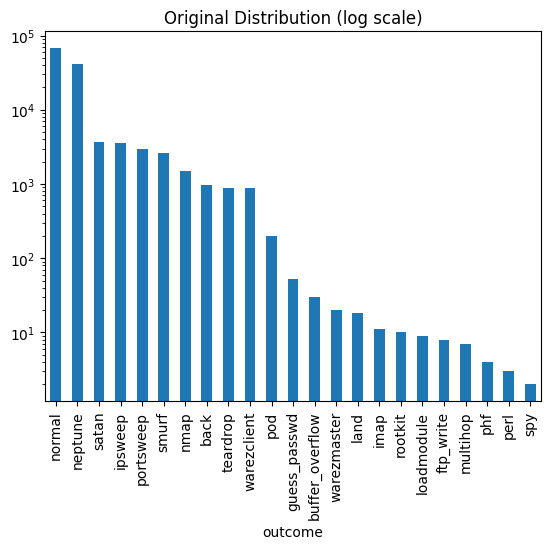

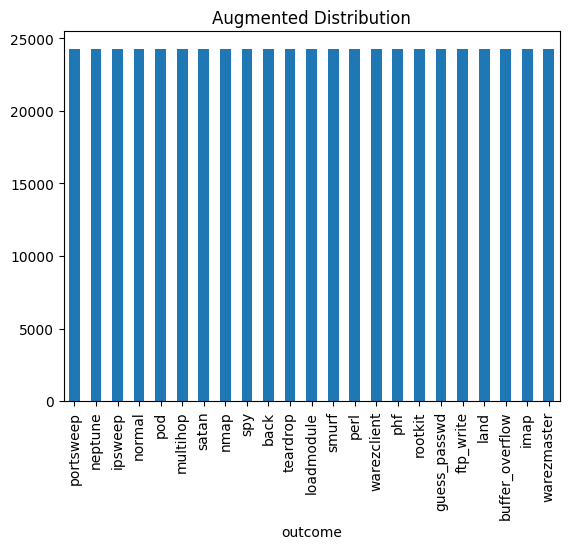

duration 0.14353153424272908
src_bytes 3.0119814463044685
dst_bytes 1.0841516214011109
land 0.04304438137732887
wrong_fragment 0.06328950895890438
urgent 0.05405782000583565
hot 0.5897021446348535
num_failed_logins 0.04757361765017247
logged_in 0.0023065675342585426
num_compromised 0.19927275963134775


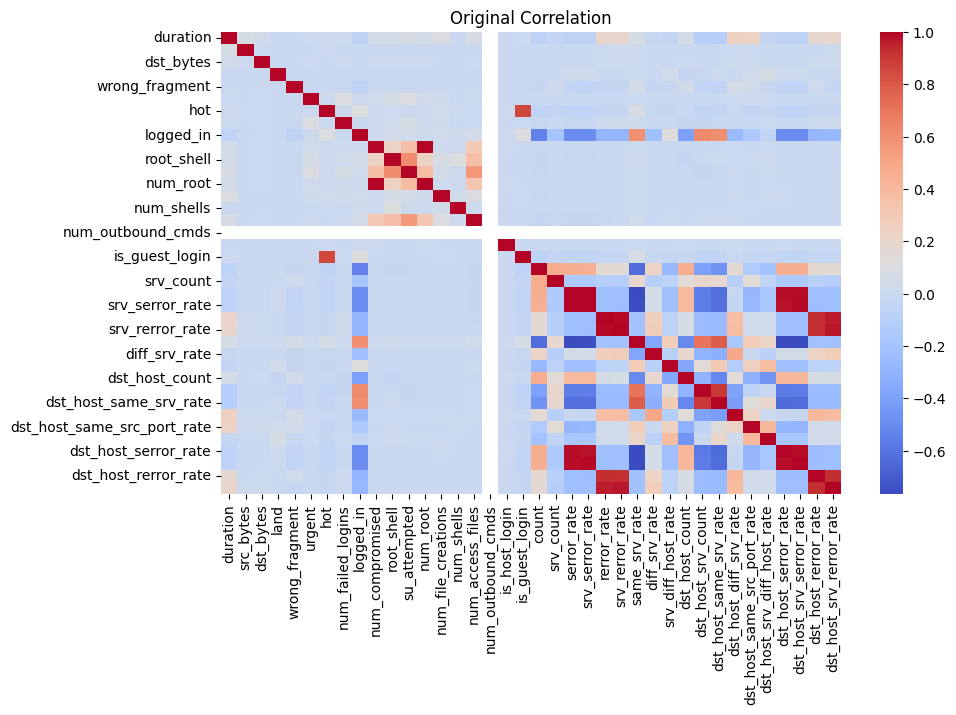

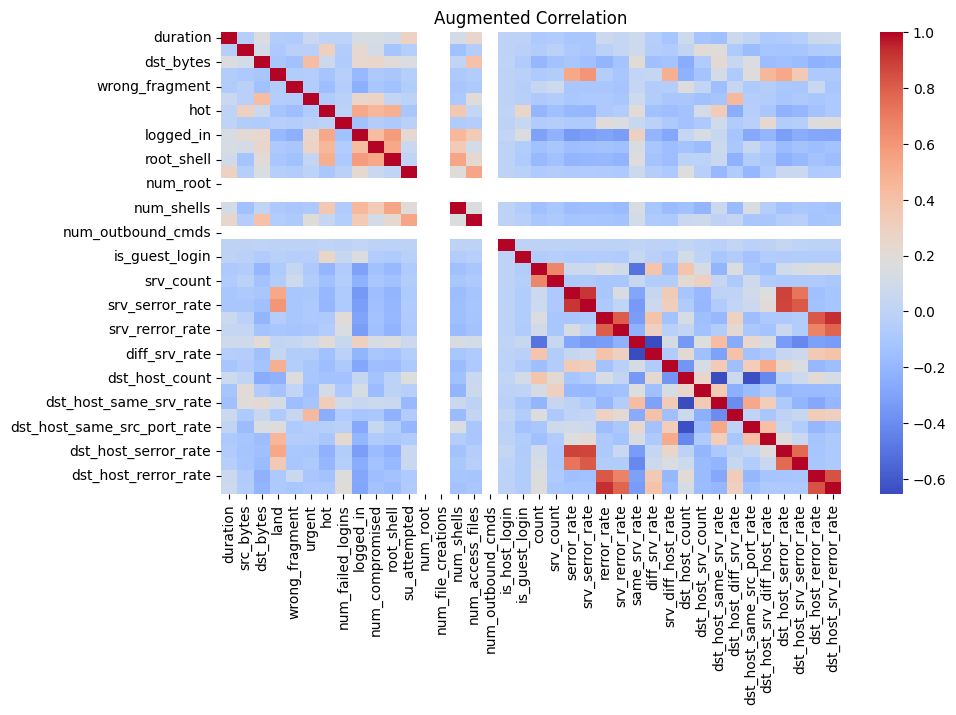

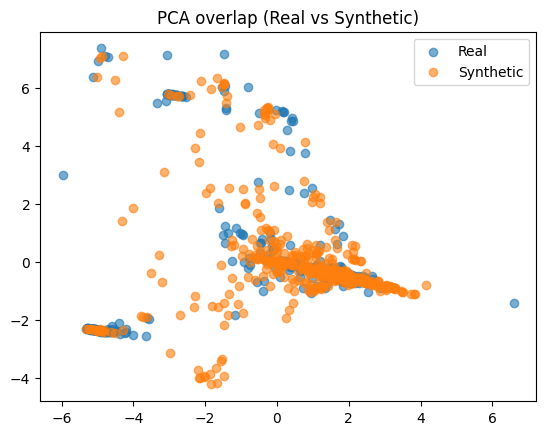

In [18]:
import matplotlib.pyplot as plt

plt.figure()
df_train['outcome'].value_counts().plot(kind='bar', logy=True)
plt.title("Original Distribution (log scale)")
plt.show()

plt.figure()
final_augmented['outcome'].value_counts().plot(kind='bar')
plt.title("Augmented Distribution")
plt.show()

from scipy.stats import entropy

def kl_divergence(real, synthetic, bins=50):
    r_hist, _ = np.histogram(real, bins=bins, density=True)
    s_hist, _ = np.histogram(synthetic, bins=bins, density=True)
    return entropy(r_hist + 1e-8, s_hist + 1e-8)

numerical = [c for c in df_train.columns if c not in categorical + ['outcome', 'level']]

for col in numerical[:10]:
    print(col, kl_divergence(df_train[col], final_augmented[col]))

import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df_train[numerical].corr(), cmap="coolwarm")
plt.title("Original Correlation")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(final_augmented[numerical].corr(), cmap="coolwarm")
plt.title("Augmented Correlation")
plt.show()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sample_real = df_train[numerical].sample(500)
sample_syn = final_augmented[numerical].sample(500)

scaler = StandardScaler()
combined = scaler.fit_transform(pd.concat([sample_real, sample_syn]))

pca = PCA(2)
proj = pca.fit_transform(combined)

plt.scatter(proj[:500,0], proj[:500,1], label="Real", alpha=0.6)
plt.scatter(proj[500:,0], proj[500:,1], label="Synthetic", alpha=0.6)
plt.legend()
plt.title("PCA overlap (Real vs Synthetic)")
plt.show()

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

categorical = ['protocol_type', 'service', 'flag']
numerical = [c for c in df_train.columns if c not in categorical + ['outcome', 'level']]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

clf = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200))
])

clf.fit(final_augmented.drop(columns=['outcome']), final_augmented['outcome'])

pred = clf.predict(df_test.drop(columns=['outcome']))
print("Macro F1 (TSTR):", f1_score(df_test['outcome'], pred, average='macro'))

Macro F1 (TSTR): 0.22021091997313053


In [24]:
clf.fit(df_train.drop(columns=['outcome']), df_train['outcome'])
baseline_pred = clf.predict(df_test.drop(columns=['outcome']))
print("Baseline Macro F1:", f1_score(df_test['outcome'], pred, average='macro'))

Baseline Macro F1: 0.23518074572153974


In [21]:
combined = pd.concat([df_train, final_augmented]).sample(frac=1)

clf.fit(combined.drop(columns=['outcome']), combined['outcome'])
pred = clf.predict(df_test.drop(columns=['outcome']))
print("Augmented Macro F1:", f1_score(df_test['outcome'], pred, average='macro'))

Augmented Macro F1: 0.23518074572153974


In [29]:
from sklearn.metrics import classification_report

print("Baseline:")
print(classification_report(df_test['outcome'], baseline_pred))

print("\nAugmented:")
print(classification_report(df_test['outcome'], pred))

Baseline:
                 precision    recall  f1-score   support

        apache2       0.00      0.00      0.00       737
           back       0.81      0.97      0.88       359
buffer_overflow       0.50      0.05      0.09        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.00      0.00      0.00      1231
     httptunnel       0.00      0.00      0.00       133
           imap       0.00      0.00      0.00         1
        ipsweep       0.92      0.98      0.95       141
           land       1.00      0.29      0.44         7
     loadmodule       0.00      0.00      0.00         2
       mailbomb       0.00      0.00      0.00       293
          mscan       0.00      0.00      0.00       996
       multihop       0.00      0.00      0.00        18
          named       0.00      0.00      0.00        17
        neptune       0.96      1.00      0.98      4657
           nmap       0.46      1.00      0.63        73
         normal     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

                 precision    recall  f1-score   support

        apache2       0.00      0.00      0.00       737
           back       0.72      0.98      0.83       359
buffer_overflow       0.17      0.05      0.08        20
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.03      0.00      0.00      1231
     httptunnel       0.00      0.00      0.00       133
           imap       0.00      0.00      0.00         1
        ipsweep       0.89      0.98      0.93       141
           land       1.00      1.00      1.00         7
     loadmodule       0.00      0.00      0.00         2
       mailbomb       0.00      0.00      0.00       293
          mscan       0.00      0.00      0.00       996
       multihop       0.00      0.00      0.00        18
          named       0.00      0.00      0.00        17
        neptune       0.95      0.99      0.97      4657
           nmap       0.43      1.00      0.60        73
         normal       0.67    

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_